# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [ ]:
# import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [74]:
toyota = pd.read_excel("C:\\Excelr Data\\Assignments\\Multi Linear Regression\\ToyotaCorolla.xlsx")
#toyota

In [75]:
toyota.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [76]:
toyota1= toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [77]:
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [78]:
toyota1.rename(columns={"Age_08_04":"Age"},inplace=True)

C:\Users\deshp\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
toyota1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [80]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [81]:
import seaborn as sn
#sn.pairplot(toyota1)

In [82]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model      

In [83]:
# Preparing model                  
ml1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota1).fit() 
ml1
# regression model

In [84]:
# Getting coefficients of variables               
ml1.params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [85]:
# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        23:52:16   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# R-squared:	0.864, Adj. R-squared:	0.863, Pvalue of cc=0.179 and Doors=0.968 both are high

In [87]:
# preparing model based only on cc
ml_cc=smf.ols('Price~cc',data = toyota1).fit()  

In [88]:
ml_cc.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.55e-06
Time:                        23:52:20   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# R-squared:	0.016, Adj. R-squared:	0.015, Pvalue of cc=0.00 
# cc is significant

In [90]:
# preparing model based only on Doors
ml_doors = smf.ols("Price~Doors", data= toyota1).fit()

In [91]:
ml_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.46e-12
Time:                        23:52:30   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# R-squared:	0.034, Adj. R-squared:	0.034, Pvalue of Doors=0.00 
# Doors is significant

In [93]:
# # preparing model based only on cc and Doors
ml_cc_doors = smf.ols("Price~cc+Doors",data= toyota1).fit()


In [94]:
ml_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.15e-15
Time:                        23:52:37   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# R-squared:	0.047, Adj. R-squared:	0.046, Pvalue of cc=0.00 and Doors=0.00 
# Doors and cc are significant
## both are signifiant

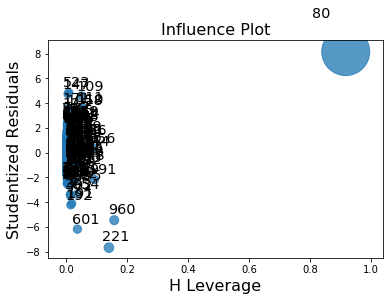

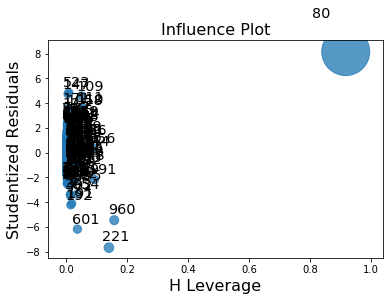

In [96]:
#plotting the influence plot
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

In [97]:
##removing 80, 960,221 and checking for significance
toyota2= toyota1.drop(toyota.index[[80,960,221]],axis=0)

In [98]:
#final model
ml_final= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota2).fit()


In [99]:
ml_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        23:52:55   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# R-squared:	0.885, Adj. R-squared:	0.885, Pvalue of Doors=0.001 and gears=0.010 
# Both are significant

In [100]:
pred_final = ml_final.predict(toyota2)
pred_final

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1431     9115.435074
1432     8499.218117
1433     8644.947302
1434     8758.664462
1435    10641.521002
Length: 1433, dtype: float64

In [101]:
##R-squared:	0.885, Adj. R-squared:	0.885, and Pvalue for all the columns are 0.000 and 0.010 is Gears and CC is 0.001
# So, final_ml model is better model

Text(0, 0.5, 'Predicted values')

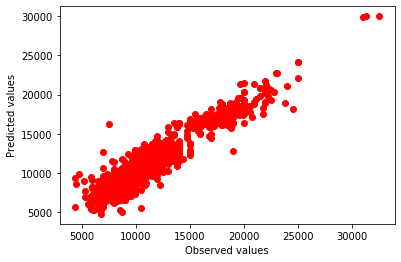

In [102]:
plt.scatter(toyota2["Price"],pred_final,c='r');plt.xlabel("Observed values");plt.ylabel("Predicted values")


In [103]:
##the observed values and fitted values are linear


Text(0, 0.5, 'Residuals')

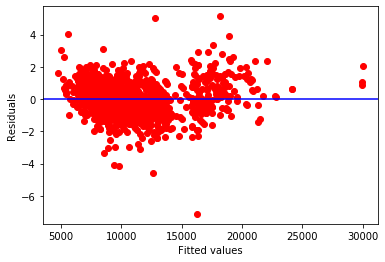

In [104]:
### Residuals v/s Fitted values
plt.scatter(pred_final, ml_final.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")


In [105]:
## errors are kind off homoscadasticity i.e there is equal variance


In [126]:
# test
from sklearn.model_selection import train_test_split


In [127]:
train_data,test_Data= train_test_split(toyota1,test_size=0.3)


In [128]:
ml_final1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()


In [129]:
ml_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     727.3
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        23:56:35   Log-Likelihood:                -8663.6
No. Observations:                1005   AIC:                         1.735e+04
Df Residuals:                     996   BIC:                         1.739e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3191.0555   1676.192     -1.904      0.057   -6480.328      98.217
Age            -120.0461      3.168    -37.899      0.000    -126.262    -113.830
KM               -0.0213      0.002    -14.139      0.000      -0.024      -0.018
HP               37.7991      3.358     11.256      0.000      31.209      44.389
cc               -0.0510      0.092     -0.557      0.577      -0.231       0.129
Doors            24.7333     48.121      0.514      0.607     -69.697     119.164
Gears           502.6050    251.893      1.995      0.046       8.303     996.907
Quarterly_Tax     6.8712      1.533      4.481      0.000       3.862       9.880
Weight           14.0530      1.176     11.947      0.000      11.745      16.361
==============================================================================
Omnibus:                       87.304   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.089
Skew:                          -0.080   Prob(JB):                    1.89e-108
Kurtosis:                       6.438   Cond. No.                     3.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
## prediction
pred_final1 = ml_final1.predict(train_data)
pred_final1

954     10083.274957
805     10691.606560
139     17094.989600
316     13204.731859
390      9765.661982
            ...     
847      9768.542076
1399     7737.974443
791      7560.116037
854     10288.931882
98      17953.456452
Length: 1005, dtype: float64

In [131]:
#train residuals
ml_final1_res = train_data["Price"]-pred_final1
ml_final1_res

954    -1183.274957
805    -1191.606560
139     2805.010400
316     -254.731859
390    -2015.661982
           ...     
847     1181.457924
1399    1212.025557
791      389.883963
854    -1338.931882
98       796.543548
Length: 1005, dtype: float64

In [132]:
##train rmse
ml_final1_rmse = np.sqrt(np.mean(ml_final1_res*ml_final1_res))
ml_final1_rmse

1341.5491016222475

In [133]:
# test prediction
ml_final1_testpred = ml_final1.predict(test_Data)
ml_final1_testpred

1359     8486.055794
825      8881.026393
700      8875.593923
630      9409.851287
593     12036.211359
            ...     
449     11743.861747
1255     8251.919315
117     18744.699630
612      8646.419605
1316     6692.168421
Length: 431, dtype: float64

In [134]:
## test residuals
ml_final1_testres= test_Data["Price"]-ml_final1_testpred
ml_final1_testres

1359     263.944206
825      868.973607
700     -876.593923
630    -1909.851287
593    -1086.211359
           ...     
449    -2843.861747
1255    -301.919315
117     -844.699630
612     -896.419605
1316     757.831579
Length: 431, dtype: float64

In [135]:
## test rmse
ml_final1_testrmse = np.sqrt(np.mean(ml_final1_testres*ml_final1_testres))
ml_final1_testrmse

1352.6702229443288

In [ ]:
# Train is = 1341.5491016222475 and Test is = 1352.6702229443288